In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools
assetsDir = "../assets/"

In [2]:
def readImg(imgName):
    img = cv2.imread(assetsDir+imgName)
    img[:,:,0], img[:,:,2] = img[:,:,2], img[:,:,0].copy()
    return img
def img2RGB(img):
    R,G,B = *[img[:,:,i] for i in range(3)], 
    return R,G,B
def RGB2img(R,G,B):
    img = np.empty((128, 128, 3),dtype=np.uint8)
    img[:,:,0],img[:,:,1],img[:,:,2] = R,G,B
    return img
def img2Grey(img):
    return img[:,:,0]*0.2126 + img[:,:,1]*0.7152 + img[:,:,2]*0.0722

### Q.11. 平滑化フィルタ

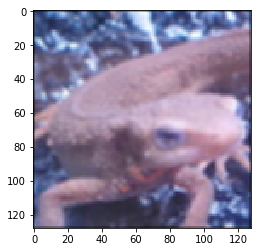

In [3]:
img = readImg("imori.jpg")
res = np.zeros_like(img,dtype=np.float64)
restmp = []
for i,j in itertools.product(range(3),range(3)):
    layer = img.copy()
    if i==0: layer = np.insert(np.delete(layer,127,axis=0),  0,0,axis=0)
    if i==2: layer = np.insert(np.delete(layer,  0,axis=0),127,0,axis=0)
    if j==0: layer = np.insert(np.delete(layer,127,axis=1),  0,0,axis=1)
    if j==2: layer = np.insert(np.delete(layer,  0,axis=1),127,0,axis=1)
    restmp.append(layer)
res = np.mean(np.array(restmp),axis=0)
res = res.astype(np.uint8)
plt.imshow(res)

### Q.12. モーションフィルタ

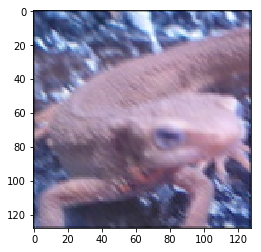

In [14]:
img = readImg("imori.jpg")
res = np.zeros_like(img,dtype=np.float64)
fil = [[1/3,0,0],[0,1/3,0],[0,0,1/3]]
for i,j in itertools.product(range(3),range(3)):
    layer = img.copy()
    if i==0: layer = np.insert(np.delete(layer,127,axis=0),  0,0,axis=0)
    if i==2: layer = np.insert(np.delete(layer,  0,axis=0),127,0,axis=0)
    if j==0: layer = np.insert(np.delete(layer,127,axis=1),  0,0,axis=1)
    if j==2: layer = np.insert(np.delete(layer,  0,axis=1),127,0,axis=1)
    res += fil[i][j]*layer
res = res.astype(np.uint8)
plt.imshow(res)

### Q.13. MAX-MINフィルタ

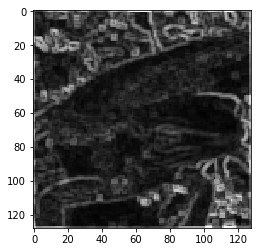

In [5]:
img = readImg("imori.jpg")
s = img2Grey(img)
restmp = []
for i,j in itertools.product(range(3),range(3)):
    layer = s.copy()
    if i==0: layer = np.insert(np.delete(layer,127,axis=0),  0,0,axis=0)
    if i==2: layer = np.insert(np.delete(layer,  0,axis=0),127,0,axis=0)
    if j==0: layer = np.insert(np.delete(layer,127,axis=1),  0,0,axis=1)
    if j==2: layer = np.insert(np.delete(layer,  0,axis=1),127,0,axis=1)
    restmp.append(layer)
res = np.max(np.array(restmp),axis=0)-np.min(np.array(restmp),axis=0)
res = res.astype(np.uint8)
resImg = RGB2img(res,res,res)
plt.imshow(resImg)

### Q.14. 微分フィルタ

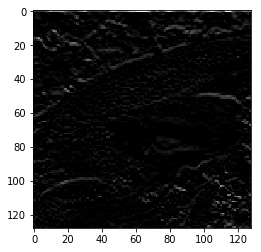

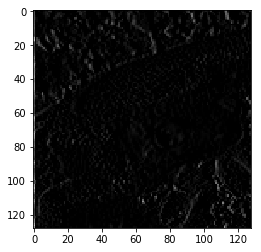

In [6]:
img = readImg("imori.jpg")
s = img2Grey(img)
res1 = np.zeros_like(s,dtype=np.float64)
fil1 = [[0,-1,0],[0,1,0],[0,0,0]]
res2 = np.zeros_like(s,dtype=np.float64)
fil2 = [[0,0,0],[-1,1,0],[0,0,0]]
for i,j in itertools.product(range(3),range(3)):
    layer = s.copy()
    if i==0: layer = np.insert(np.delete(layer,127,axis=0),  0,0,axis=0)
    if i==2: layer = np.insert(np.delete(layer,  0,axis=0),127,0,axis=0)
    if j==0: layer = np.insert(np.delete(layer,127,axis=1),  0,0,axis=1)
    if j==2: layer = np.insert(np.delete(layer,  0,axis=1),127,0,axis=1)
    res1 += fil1[i][j]*layer
    res2 += fil2[i][j]*layer
res1 = np.where(res1<0,0,res1).astype(np.uint8)
resImg1 = RGB2img(res1,res1,res1)
plt.imshow(resImg1)
plt.show()
res2 = np.where(res2<0,0,res2).astype(np.uint8)
resImg2 = RGB2img(res2,res2,res2)
plt.imshow(resImg2)

### Q.15. Sobelフィルタ

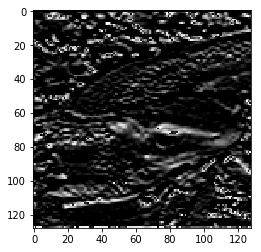

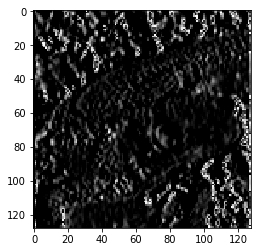

In [7]:
img = readImg("imori.jpg")
s = img2Grey(img)
res1 = np.zeros_like(s,dtype=np.float64)
fil1 = [[1,2,1],[0,0,0],[-1,-2,-1]]
res2 = np.zeros_like(s,dtype=np.float64)
fil2 = [[1,0,-1],[2,0,-2],[1,0,-1]]
for i,j in itertools.product(range(3),range(3)):
    layer = s.copy()
    if i==0: layer = np.insert(np.delete(layer,127,axis=0),  0,0,axis=0)
    if i==2: layer = np.insert(np.delete(layer,  0,axis=0),127,0,axis=0)
    if j==0: layer = np.insert(np.delete(layer,127,axis=1),  0,0,axis=1)
    if j==2: layer = np.insert(np.delete(layer,  0,axis=1),127,0,axis=1)
    res1 += fil1[i][j]*layer
    res2 += fil2[i][j]*layer
res1 = np.where(res1<0,0,res1).astype(np.uint8)
resImg1 = RGB2img(res1,res1,res1)
plt.imshow(resImg1)
plt.show()
res2 = np.where(res2<0,0,res2).astype(np.uint8)
resImg2 = RGB2img(res2,res2,res2)
plt.imshow(resImg2)

### Q.16. Prewittフィルタ

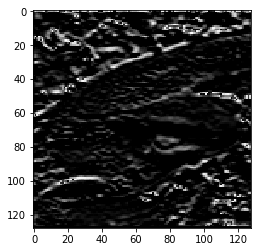

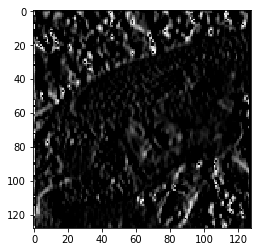

In [8]:
img = readImg("imori.jpg")
s = img2Grey(img)
res1 = np.zeros_like(s,dtype=np.float64)
fil1 = [[-1,-1,-1],[0,0,0],[1,1,1]]
res2 = np.zeros_like(s,dtype=np.float64)
fil2 = [[-1,0,1],[-1,0,1],[-1,0,1]]
for i,j in itertools.product(range(3),range(3)):
    layer = s.copy()
    if i==0: layer = np.insert(np.delete(layer,127,axis=0),  0,0,axis=0)
    if i==2: layer = np.insert(np.delete(layer,  0,axis=0),127,0,axis=0)
    if j==0: layer = np.insert(np.delete(layer,127,axis=1),  0,0,axis=1)
    if j==2: layer = np.insert(np.delete(layer,  0,axis=1),127,0,axis=1)
    res1 += fil1[i][j]*layer
    res2 += fil2[i][j]*layer
res1 = np.where(res1<0,0,res1).astype(np.uint8)
resImg1 = RGB2img(res1,res1,res1)
plt.imshow(resImg1)
plt.show()
res2 = np.where(res2<0,0,res2).astype(np.uint8)
resImg2 = RGB2img(res2,res2,res2)
plt.imshow(resImg2)

### Q.17. Laplacianフィルタ

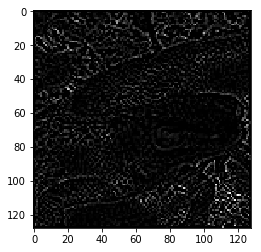

In [9]:
img = readImg("imori.jpg")
s = img2Grey(img)
res = np.zeros_like(s,dtype=np.float64)
fil = [[0,1,0],[1,-4,1],[0,1,0]]
for i,j in itertools.product(range(3),range(3)):
    layer = s.copy()
    if i==0: layer = np.insert(np.delete(layer,127,axis=0),  0,0,axis=0)
    if i==2: layer = np.insert(np.delete(layer,  0,axis=0),127,0,axis=0)
    if j==0: layer = np.insert(np.delete(layer,127,axis=1),  0,0,axis=1)
    if j==2: layer = np.insert(np.delete(layer,  0,axis=1),127,0,axis=1)
    res += fil[i][j]*layer
res = np.where(res<0,0,res).astype(np.uint8)
resImg = RGB2img(res,res,res)
plt.imshow(resImg)

### Q.18. Embossフィルタ

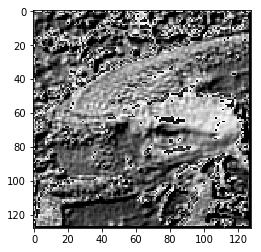

In [10]:
img = readImg("imori.jpg")
s = img2Grey(img)
res = np.zeros_like(s,dtype=np.float64)
fil = [[-2,-1,0],[-1,1,1],[0,1,2]]
for i,j in itertools.product(range(3),range(3)):
    layer = s.copy()
    if i==0: layer = np.insert(np.delete(layer,127,axis=0),  0,0,axis=0)
    if i==2: layer = np.insert(np.delete(layer,  0,axis=0),127,0,axis=0)
    if j==0: layer = np.insert(np.delete(layer,127,axis=1),  0,0,axis=1)
    if j==2: layer = np.insert(np.delete(layer,  0,axis=1),127,0,axis=1)
    res += fil[i][j]*layer
res = np.where(res<0,0,res).astype(np.uint8)
resImg = RGB2img(res,res,res)
plt.imshow(resImg)

### Q.19. LoGフィルタ

参考 https://algorithm.joho.info/image-processing/laplacian-of-gaussian-filter/

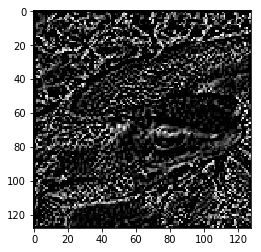

In [11]:
img = readImg("imori.jpg")
s = img2Grey(img)
res = np.zeros_like(s,dtype=np.float64)
fil = [[0,0,1,0,0],[0,1,2,1,0],[1,2,-16,2,1],[0,1,2,1,0],[0,0,1,0,0]]
for i,j in itertools.product(range(5),range(5)):
    layer = s.copy()
    if i==0: layer = np.insert(np.delete(layer,127,axis=0),  0,0,axis=0)
    if i<=1: layer = np.insert(np.delete(layer,127,axis=0),  0,0,axis=0)
    if i>=4: layer = np.insert(np.delete(layer,  0,axis=0),127,0,axis=0)
    if i==5: layer = np.insert(np.delete(layer,  0,axis=0),127,0,axis=0)
    if j==0: layer = np.insert(np.delete(layer,127,axis=1),  0,0,axis=1)
    if j<=1: layer = np.insert(np.delete(layer,127,axis=1),  0,0,axis=1)
    if j>=4: layer = np.insert(np.delete(layer,  0,axis=1),127,0,axis=1)
    if j==5: layer = np.insert(np.delete(layer,  0,axis=1),127,0,axis=1)
    res += fil[i][j]*layer
res = np.where(res<0,0,res).astype(np.uint8)
resImg = RGB2img(res,res,res)
plt.imshow(resImg)

### Q.20. ヒストグラム表示

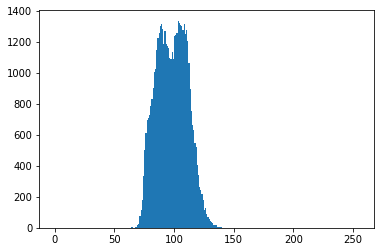

In [12]:
img = readImg("imori_dark.jpg")
plt.hist(img.flatten(),bins=255, range=(0, 255))
plt.show()